/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


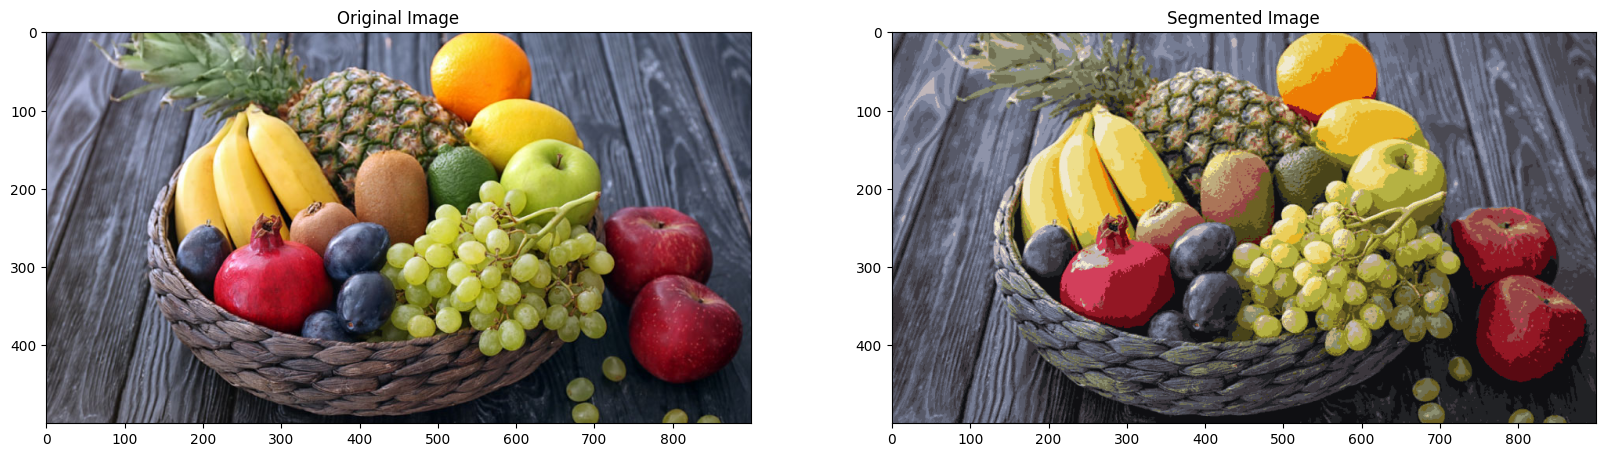

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import KDTree
from skimage import io
import cv2

def D2(image, n_clusters, coreset_size):
    # Sample a coreset
    w, h, d = original_shape = tuple(image.shape)
    coreset_indices = np.random.choice(w * h, coreset_size, replace=False)
    coreset = image.reshape(-1, d)[coreset_indices]

    # Perform K-means++ clustering
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(coreset)
    labels = kmeans.predict(image.reshape(-1, d))
    return labels.reshape((w, h))

def Sampling(clustered_image, original_image):
    w, h, d = original_image.shape
    flat_original_image = np.reshape(original_image, (w * h, d))
    # Construct KD-tree for quick nearest neighbor search
    tree = KDTree(flat_original_image)
    # Map each pixel in the clustered image to its nearest neighbor in the original image
    mapped_image = np.zeros((w, h, d), dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            pixel_rgb = original_image[i, j]
            nearest_neighbor_index = tree.query(pixel_rgb.reshape(1, -1))[1][0]
            mapped_image[i, j] = flat_original_image[nearest_neighbor_index]
    return mapped_image

# Load input image
input_image = cv2.imread('fruits.jpg')

# Reshape the image to be a list of RGB pixels
pixels = input_image.reshape(-1, 3)

# Adjust the coreset size as needed
kmeans = KMeans(n_clusters=26)
kmeans.fit(pixels)

segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(input_image.shape).astype(np.uint8)
cv2.imwrite('output_image.jpg', segmented_image)

original_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
segmented_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].imshow(original_rgb)
ax[0].title.set_text('Original Image')

ax[1].imshow(segmented_rgb)
ax[1].title.set_text('Segmented Image')

plt.show()